In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import random
from os import listdir
%matplotlib inline
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# CNN

In [2]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [3]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 873


In [4]:
#Normalise images
images = np.array(images)
images = images[:,30:]
images /= 255.0

In [5]:
#convert datas to dummyvalues
labels_loc = np.array(pd.get_dummies(labels_loc))

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 (66, 160, 3))

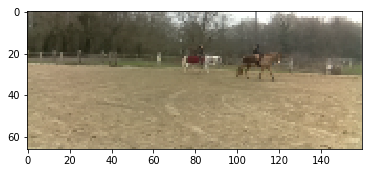

In [6]:
labels_loc[42], plt.imshow(images[42]), images[42].shape

In [7]:
#from keras.models import load_model
#model = load_model("model.h5")

In [8]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=images[0].shape, name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
#x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
#x = BatchNormalization()(x)
#x = Activation("relu")(x)
#x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(labels_loc.shape[1], activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 66, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 14, 37, 4)         0         
__________

In [9]:
model_name="model_CNN.h5"

In [10]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [11]:
h = model.fit(images, labels_loc, batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 698 samples, validate on 175 samples
Epoch 1/100
698/698 [==============================] - 4s 6ms/step - loss: 2.3476 - acc: 0.2321 - val_loss: 1.8642 - val_acc: 0.4286

Epoch 00001: val_loss improved from inf to 1.86417, saving model to model_CNN.h5
Epoch 2/100
698/698 [==============================] - 3s 4ms/step - loss: 1.9101 - acc: 0.3897 - val_loss: 3.6626 - val_acc: 0.1314

Epoch 00002: val_loss did not improve
Epoch 3/100
698/698 [==============================] - 3s 4ms/step - loss: 1.6189 - acc: 0.4628 - val_loss: 1.8003 - val_acc: 0.4171

Epoch 00003: val_loss improved from 1.86417 to 1.80028, saving model to model_CNN.h5
Epoch 4/100
698/698 [==============================] - 3s 5ms/step - loss: 1.3933 - acc: 0.5516 - val_loss: 1.8530 - val_acc: 0.3771

Epoch 00004: val_loss did not improve
Epoch 5/100
698/698 [==============================] - 4s 5ms/step - loss: 1.2616 - acc: 0.5831 - val_loss: 1.3281 - val_acc: 0.6171

Epoch 00005: val_loss improved from 1.8002

698/698 [==============================] - 4s 5ms/step - loss: 0.1779 - acc: 0.9542 - val_loss: 2.6925 - val_acc: 0.3714

Epoch 00044: val_loss did not improve
Epoch 45/100
698/698 [==============================] - 4s 5ms/step - loss: 0.1806 - acc: 0.9427 - val_loss: 0.7919 - val_acc: 0.6857

Epoch 00045: val_loss did not improve
Epoch 46/100
698/698 [==============================] - 4s 5ms/step - loss: 0.1714 - acc: 0.9513 - val_loss: 0.2359 - val_acc: 0.9086

Epoch 00046: val_loss improved from 0.24954 to 0.23591, saving model to model_CNN.h5
Epoch 47/100
698/698 [==============================] - 3s 5ms/step - loss: 0.1538 - acc: 0.9585 - val_loss: 0.2210 - val_acc: 0.9029

Epoch 00047: val_loss improved from 0.23591 to 0.22101, saving model to model_CNN.h5
Epoch 48/100
698/698 [==============================] - 3s 5ms/step - loss: 0.1649 - acc: 0.9527 - val_loss: 0.8343 - val_acc: 0.6457

Epoch 00048: val_loss did not improve
Epoch 49/100
698/698 [==============================] 

698/698 [==============================] - 4s 5ms/step - loss: 0.0728 - acc: 0.9785 - val_loss: 0.2595 - val_acc: 0.9200

Epoch 00090: val_loss did not improve
Epoch 91/100
698/698 [==============================] - 3s 5ms/step - loss: 0.0821 - acc: 0.9771 - val_loss: 0.2368 - val_acc: 0.9257

Epoch 00091: val_loss did not improve
Epoch 92/100
698/698 [==============================] - 4s 5ms/step - loss: 0.0791 - acc: 0.9771 - val_loss: 0.9010 - val_acc: 0.7371

Epoch 00092: val_loss did not improve
Epoch 93/100
698/698 [==============================] - 4s 5ms/step - loss: 0.0751 - acc: 0.9799 - val_loss: 0.6613 - val_acc: 0.7829

Epoch 00093: val_loss did not improve
Epoch 94/100
698/698 [==============================] - 4s 5ms/step - loss: 0.0790 - acc: 0.9728 - val_loss: 0.2448 - val_acc: 0.9200

Epoch 00094: val_loss did not improve
Epoch 95/100
698/698 [==============================] - 3s 5ms/step - loss: 0.0655 - acc: 0.9785 - val_loss: 0.2124 - val_acc: 0.9314

Epoch 00095: 

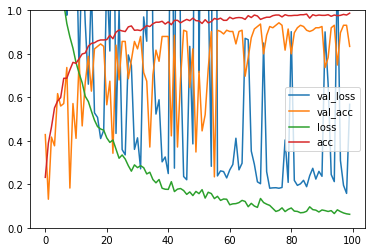

In [12]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

## RNN

In [13]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    for name in sorted(dir_list, key=lambda name : name.split("_")[1].split(".png")[0]):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [14]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 873


In [15]:
#Normalise images
images = np.array(images)
images = images[:,30:]
images /= 255.0

In [16]:
win_size = 2

images_seq = []
labels_loc_seq =[]

for i, image in enumerate(images):
    if len(images) > i + win_size:
        images_seq.append(images[i:i + win_size])
        
for i, label_loc in enumerate(labels_loc):
    if len(labels_loc) > i + win_size:
        labels_loc_seq.append(labels_loc[i+win_size-1])  

In [17]:
c = list(zip(images_seq, labels_loc_seq))
random.shuffle(c)
images_seq, labels_loc_seq = zip(*c)

In [18]:
images_seq = np.array(images_seq)
labels_loc_seq = np.array(pd.get_dummies(labels_loc_seq))

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

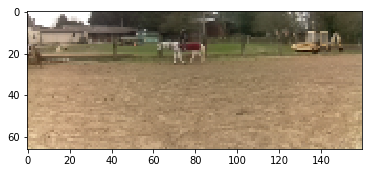

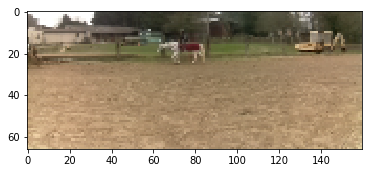

In [19]:
for image in images_seq[42]:
    fig, axes = plt.subplots()
    axes.imshow(image)
labels_loc_seq[42]

In [20]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=images_seq[0].shape, name='img_in')
x = img_in

x = TimeDistributed(Convolution2D(2, (5,5), strides=(2,2), use_bias=False))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = TimeDistributed(Convolution2D(4, (5,5), strides=(2,2), use_bias=False))(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)

x = TimeDistributed(Flatten(name='flattened'))(x)

x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(labels_loc_seq.shape[1], activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 2, 66, 160, 3)     0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 31, 78, 2)      150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 31, 78, 2)      8         
_________________________________________________________________
activation_1 (Activation)    (None, 2, 31, 78, 2)      0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 14, 37, 4)      200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 14, 37, 4)      16        
_________________________________________________________________
activation_2 (Activation)    (None, 2, 14, 37, 4)      0         
__________

In [21]:
model_name="model_RNN.h5"

In [22]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [23]:
h = model.fit(images_seq, labels_loc_seq, batch_size=16, epochs=50, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 696 samples, validate on 175 samples
Epoch 1/50
696/696 [==============================] - 10s 14ms/step - loss: 2.4427 - acc: 0.1911 - val_loss: 1.8637 - val_acc: 0.3771

Epoch 00001: val_loss improved from inf to 1.86368, saving model to model_RNN.h5
Epoch 2/50
696/696 [==============================] - 7s 11ms/step - loss: 1.8571 - acc: 0.3793 - val_loss: 1.5929 - val_acc: 0.4229

Epoch 00002: val_loss improved from 1.86368 to 1.59293, saving model to model_RNN.h5
Epoch 3/50
696/696 [==============================] - 8s 12ms/step - loss: 1.5060 - acc: 0.5000 - val_loss: 1.3267 - val_acc: 0.5543

Epoch 00003: val_loss improved from 1.59293 to 1.32668, saving model to model_RNN.h5
Epoch 4/50
696/696 [==============================] - 7s 10ms/step - loss: 1.3313 - acc: 0.5503 - val_loss: 0.9238 - val_acc: 0.6800

Epoch 00004: val_loss improved from 1.32668 to 0.92381, saving model to model_RNN.h5
Epoch 5/50
696/696 [==============================] - 7s 10ms/step - loss: 1.1832

696/696 [==============================] - 7s 10ms/step - loss: 0.1106 - acc: 0.9741 - val_loss: 0.1040 - val_acc: 0.9714

Epoch 00044: val_loss did not improve
Epoch 45/50
696/696 [==============================] - 7s 10ms/step - loss: 0.0971 - acc: 0.9770 - val_loss: 0.1264 - val_acc: 0.9600

Epoch 00045: val_loss did not improve
Epoch 46/50
696/696 [==============================] - 7s 10ms/step - loss: 0.0738 - acc: 0.9770 - val_loss: 0.1717 - val_acc: 0.9429

Epoch 00046: val_loss did not improve
Epoch 47/50
696/696 [==============================] - 7s 10ms/step - loss: 0.0838 - acc: 0.9813 - val_loss: 0.1230 - val_acc: 0.9600

Epoch 00047: val_loss did not improve
Epoch 48/50
696/696 [==============================] - 8s 11ms/step - loss: 0.0603 - acc: 0.9856 - val_loss: 0.1482 - val_acc: 0.9543

Epoch 00048: val_loss did not improve
Epoch 49/50
696/696 [==============================] - 7s 11ms/step - loss: 0.0714 - acc: 0.9856 - val_loss: 0.4473 - val_acc: 0.8286

Epoch 00049:

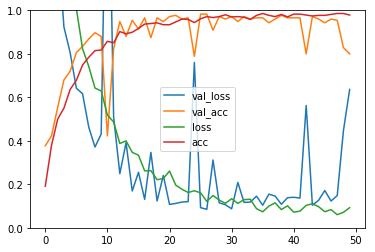

In [24]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))